# Wilson and Cowan Model

## No Drive

Generate the NeuroML/LEMS file with the Wilson and Cowan definition

In [1]:
# need to move to NeuroML directory in order to do run the python script
% cd ../NeuroML2
! python GenerateWilsonCowanLEMS.py -ie0 0 -ii0 0

/Users/jessica/Dropbox/GSoC/WilsonCowan/NeuroML2
pyNeuroML >>> Written LEMS Simulation LEMS_WC_slowSim.xml to file: LEMS_WC_slowSim.xml


Run pynml to simulate the defined LEMS

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

no_drive_lems_file='LEMS_WC_slowSim.xml'
no_drive_results = pynml.run_lems_with_jneuroml(no_drive_lems_file, nogui=True, load_saved_data=True, plot=False)

pyNeuroML >>> Reloading data specified in LEMS file: LEMS_WC_slowSim.xml (/Users/jessica/Dropbox/GSoC/WilsonCowan/NeuroML2/LEMS_WC_slowSim.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/WilsonCowan/NeuroML2


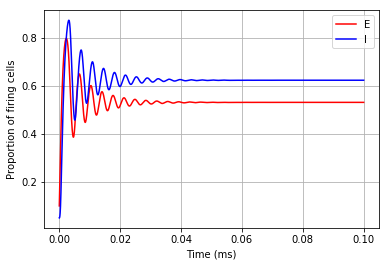

In [7]:
plt.plot(no_drive_results['t'], no_drive_results['EDLPop/0/EDL/R'], label='E', color='r')
plt.plot(no_drive_results['t'], no_drive_results['IDLPop/0/IDL/R'], label='I', color='b')
plt.xlabel('Time (ms)')
plt.ylabel('Proportion of firing cells')
plt.legend()
plt.grid(True)

## Driven 

In [4]:
# Run driven simulation
! python GenerateWilsonCowanLEMS.py -ie0 0.5 -ii0 0.5

pyNeuroML >>> Written LEMS Simulation LEMS_WC_drivenSim.xml to file: LEMS_WC_drivenSim.xml


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

driven_lems_file='LEMS_WC_drivenSim.xml'
driven_results = pynml.run_lems_with_jneuroml(driven_lems_file, nogui=True, load_saved_data=True, plot=False)

pyNeuroML >>> Reloading data specified in LEMS file: LEMS_WC_drivenSim.xml (/Users/jessica/Dropbox/GSoC/WilsonCowan/NeuroML2/LEMS_WC_drivenSim.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/WilsonCowan/NeuroML2


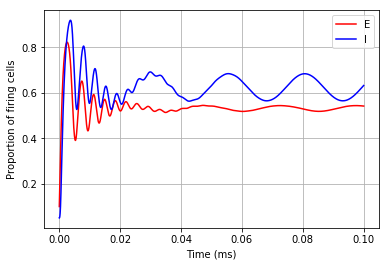

In [8]:
plt.plot(driven_results['t'], driven_results['EDLPop/0/EDL/R'], label='E', color='r')
plt.plot(driven_results['t'], driven_results['IDLPop/0/IDL/R'], label='I', color='b')
plt.xlabel('Time (ms)')
plt.ylabel('Proportion of firing cells')
plt.legend()
plt.grid(True)